In [1]:
# Import plotting modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

In [11]:
# import data file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
titanic = pd.concat([test,train],sort='False') #combine the sets
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [127]:
#Select only  passenger without Nan Age
titanic_modified = titanic.loc[titanic['Age'].isnull() == False]
titanic_number = titanic[['Age','Fare','Parch','PassengerId','Pclass','Survived']]
titanic_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          272 non-null object
Embarked       1044 non-null object
Fare           1045 non-null float64
Name           1046 non-null object
Parch          1046 non-null int64
PassengerId    1046 non-null int64
Pclass         1046 non-null int64
Sex            1046 non-null object
SibSp          1046 non-null int64
Survived       714 non-null float64
Ticket         1046 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 106.2+ KB


In [107]:
titanic_modified.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
880,25.0,NaN,S,26.0000,"Shelley, Mrs. William (Imanita Parrish Hall)",1,881,2,female,0,1.0,230433
881,33.0,NaN,S,7.8958,"Markun, Mr. Johann",0,882,3,male,0,0.0,349257
882,22.0,NaN,S,10.5167,"Dahlberg, Miss. Gerda Ulrika",0,883,3,female,0,0.0,7552
883,28.0,NaN,S,10.5000,"Banfield, Mr. Frederick James",0,884,2,male,0,0.0,C.A./SOTON 34068
884,25.0,NaN,S,7.0500,"Sutehall, Mr. Henry Jr",0,885,3,male,0,0.0,SOTON/OQ 392076
885,39.0,NaN,Q,29.1250,"Rice, Mrs. William (Margaret Norton)",5,886,3,female,0,0.0,382652
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369
890,32.0,NaN,Q,7.7500,"Dooley, Mr. Patrick",0,891,3,male,0,0.0,370376


In [108]:
# Set default Seaborn style
sns.set()

In [109]:
# Compute number of data points: n_data
n_data = len(titanic_modified.Age)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

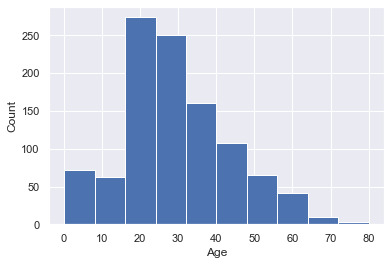

In [110]:
#Compute Histogram
plt.hist(titanic_modified.Age)
plt.xlabel('Age')
plt.ylabel('Count')

# Show histogram
plt.show()


In [111]:
#Compute the Survided age
#titanic = titanic.dropna()
Survived = titanic_modified.loc[titanic_modified['Survived'] == 1]
ageSurvived = np.sort(Survived['Age'])

#Compute the not Survided age
nSurvived = titanic_modified.loc[titanic_modified['Survived'] == 0]
ageNotSurvived = np.sort(nSurvived['Age'])

In [112]:
#splitting based on the class
Pclass1 = titanic_modified.loc[titanic_modified.Pclass == 1]
Pclass2 = titanic_modified.loc[titanic_modified.Pclass == 2]
Pclass3 = titanic_modified.loc[titanic_modified.Pclass == 3]

In [113]:
#Survived
print ("Survived Mean: ",np.mean(ageSurvived)," Survived STD: ",np.std(ageSurvived))

#Not Survived
print ("Not Survived Mean: ",np.mean(ageNotSurvived)," Not Survived STD: ",np.std(ageNotSurvived))

Survived Mean:  28.343689655172415  Survived STD:  14.925152220337246
Not Survived Mean:  30.62617924528302  Not Survived STD:  14.155387617772272


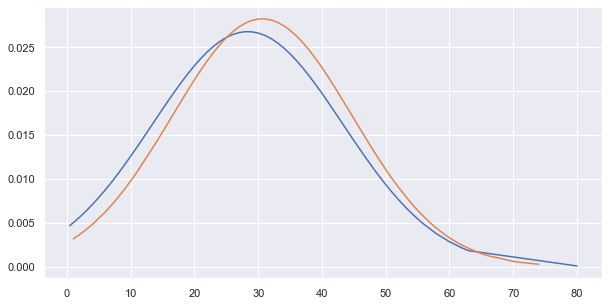

In [125]:
#Compute and plot the PDF
plt.figure(num=None, figsize=(10, 5))
pdf = stats.norm.pdf(ageSurvived, np.mean(ageSurvived), np.std(ageSurvived))
plt.plot(ageSurvived, pdf)

#Compute and plot the PDF
pdf2 = stats.norm.pdf(ageNotSurvived, np.mean(ageNotSurvived), np.std(ageNotSurvived))
plt.plot(ageNotSurvived, pdf2)


#Define Legend
#plt.legend(('std = Survived', 'std = Not Survived'))
plt.show()

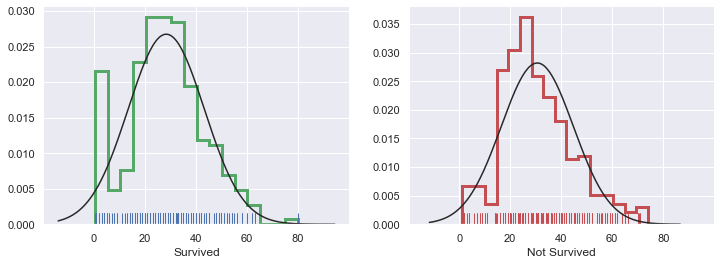

In [23]:
# Plot the PDF.
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 4), sharex=True)
sns.despine(left=True)

_ = sns.distplot(ageSurvived,
                 rug=True,
                 axlabel="Survived",
                 fit=norm, 
                 kde=False, 
                 kde_kws={"color": "g", "lw": 3},
                 hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"},
                 ax=ax1)

_ = sns.distplot(ageNotSurvived,
                 fit=norm,
                 color = 'r',
                 axlabel="Not Survived",
                 rug=True, 
                 kde=False,
                 hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r"},
                 kde_kws={"color": "y", "lw": 3},
                 ax=ax2)
#Define Legend

plt.show()


In [115]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n 
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1)/n

    return x, y

In [116]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers,y_vers = ecdf(titanic_modified['Age'])

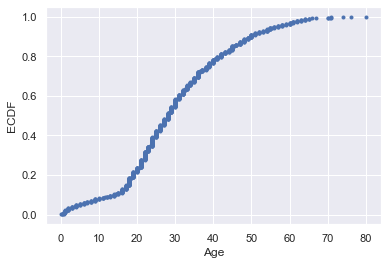

In [117]:
# Label the axes
plt.xlabel('Age')
plt.ylabel('ECDF')
# Generate plot
plt.plot(x_vers,y_vers, marker = '.', linestyle = 'none')

In [28]:
#Compute the mean
np.mean(titanic_modified['Age'])

29.881137667304014

In [29]:
#Compute the variance
np.var(titanic_modified['Age'],ddof=1)

207.74878655136456

In [30]:
#Compute the standard deviation
np.std(titanic_modified['Age'])

14.406601748667827

In [118]:
#The describe() function computes a summary of statistics pertaining to the DataFrame columns.
titanic_modified.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1045.000000,1046.00000,1046.000000,1046.000000,1046.000000,714.000000
mean,29.881138,36.686080,0.42065,655.362333,2.207457,0.502868,0.406162
std,14.413493,55.732533,0.83975,377.661401,0.841497,0.912167,0.491460
min,0.170000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,8.050000,0.00000,326.250000,1.000000,0.000000,0.000000
50%,28.000000,15.750000,0.00000,662.500000,2.000000,0.000000,0.000000
75%,39.000000,35.500000,1.00000,973.750000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.00000,1307.000000,3.000000,8.000000,1.000000


In [119]:
#The describe() function computes a summary of statistics pertaining to the DataFrame columns.
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


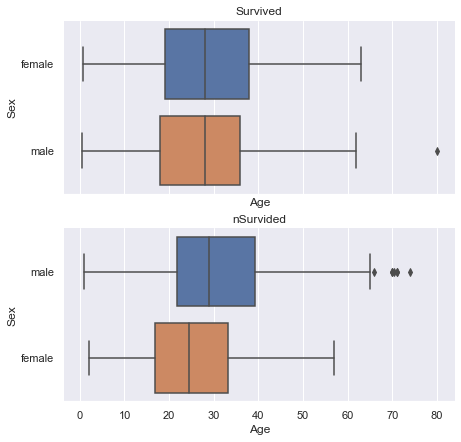

In [33]:
# Set up the matplotlib figure
f, axes = plt.subplots(2,figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Label the axes
plt.xlabel('Age')
plt.ylabel('Sex')

# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='Age',y='Sex',data=Survived,ax=axes[0])
_.set_title('Survived')

_ = sns.boxplot(x='Age',y='Sex',data=nSurvived,ax = axes[1])
_.set_title("nSurvided")

# Show the plot
plt.show()

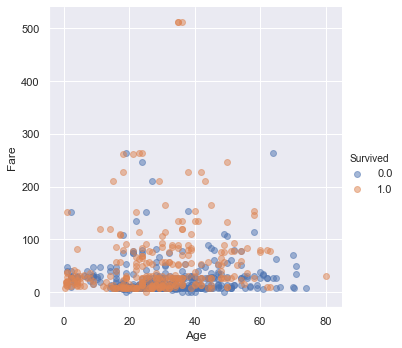

In [35]:
# Make a scatter plot
sns.lmplot(x='Age', y='Fare', hue='Survived', data=titanic_modified, fit_reg=False, scatter_kws={'alpha':0.5})

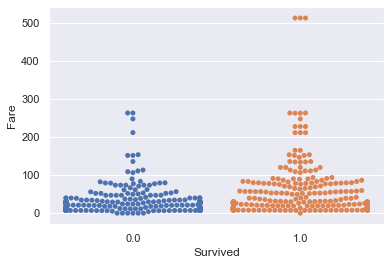

In [36]:
sns.swarmplot(x='Survived', y='Fare', data=titanic_modified);

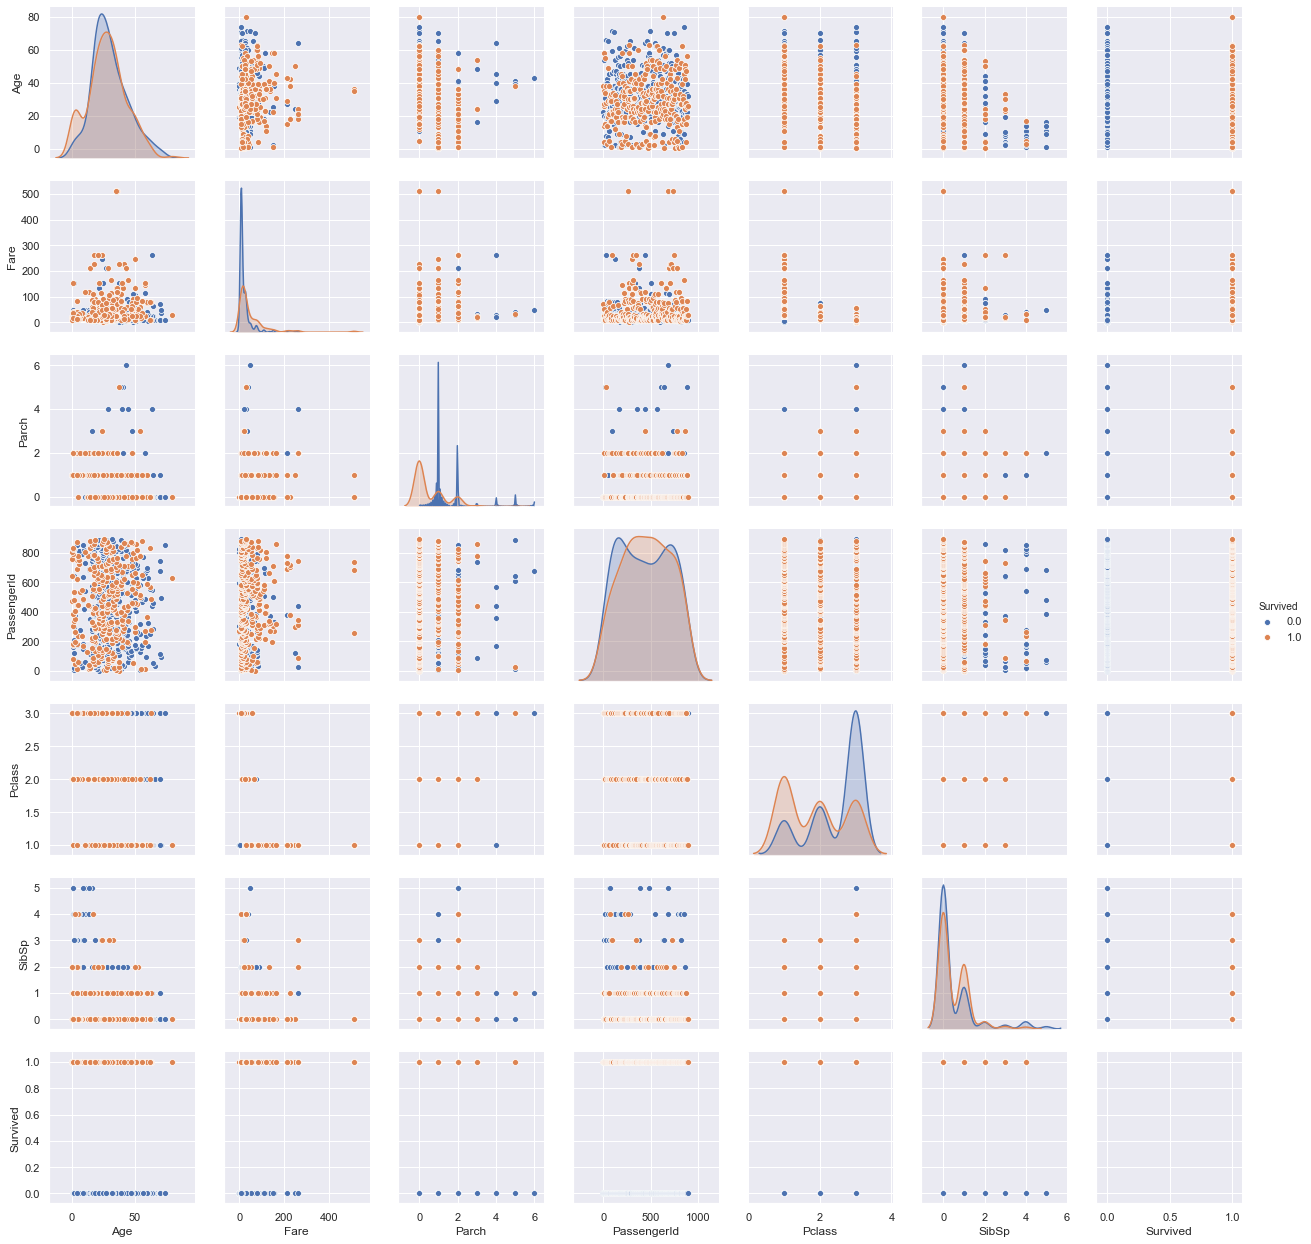

In [38]:
sns.pairplot(titanic_modified, hue='Survived');

In [43]:
# Compute Pearson correlation coefficient: r
r = titanic_modified.corr()

# Print the result'
print(r)

                  Age      Fare     Parch  PassengerId    Pclass     SibSp  \
Age          1.000000  0.178740 -0.150917     0.028814 -0.408106 -0.243699   
Fare         0.178740  1.000000  0.216723     0.047938 -0.565255  0.141184   
Parch       -0.150917  0.216723  1.000000    -0.021096  0.017224  0.374456   
PassengerId  0.028814  0.047938 -0.021096     1.000000 -0.064097 -0.050700   
Pclass      -0.408106 -0.565255  0.017224    -0.064097  1.000000  0.047221   
SibSp       -0.243699  0.141184  0.374456    -0.050700  0.047221  1.000000   
Survived    -0.077221  0.268189  0.093317     0.029340 -0.359653 -0.017358   

             Survived  
Age         -0.077221  
Fare         0.268189  
Parch        0.093317  
PassengerId  0.029340  
Pclass      -0.359653  
SibSp       -0.017358  
Survived     1.000000  


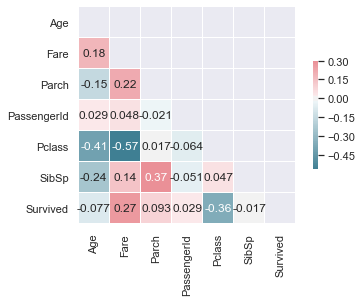

In [75]:
# heat map
mask = np.triu(np.ones_like(r, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(r,annot=True,mask=mask,
            cmap=cmap,vmax=.3,
            center=0,square=True,
           linewidths=.5, cbar_kws={"shrink": .5})


In [60]:
titanic_modified_hm.head()

,Age,Fare,PassengerId,Pclass,SibSp,Survived
0,22.0,7.2500,1,3,1,0.0
1,38.0,71.2833,2,1,1,1.0
2,26.0,7.9250,3,3,0,1.0
3,35.0,53.1000,4,1,1,1.0
4,35.0,8.0500,5,3,0,0.0


In [89]:
#Compute the Hypothesis testing
bySexTitanic=titanic[['Survived', 'Sex']]

#Selecet Survived passengers counting the sex (female and male)
titanicSS = bySexTitanic.groupby('Survived')['Sex'].value_counts()
print("Titanic Table\n",titanicSS)

#Pivot the table to index Survived and transform Sex into Columns agg by len
titanicPivotBySex = pd.pivot_table(bySexTitanic, index = ['Survived'],columns = 'Sex', aggfunc = len)

print("\nTitanic Pivot Table\n",titanicPivotBySex)

#Compute the chi2
chi2, pval, dof, expected = stats.chi2_contingency(titanicPivotBySex)

print("\nChi-Squared value:", chi2)
print("pval value:",pval)

Titanic Table
 Survived  Sex   
0.0       male      468
          female     81
1.0       female    233
          male      109
Name: Sex, dtype: int64

Titanic Pivot Table
 Sex       female  male
Survived              
0.0           81   468
1.0          233   109

Chi-Squared value: 260.71702016732104
pval value: 1.1973570627755645e-58


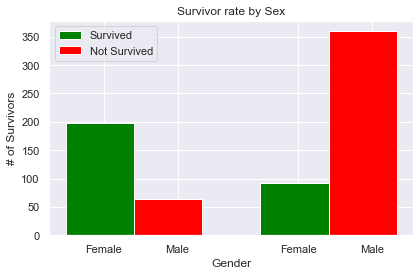

In [106]:
# data to plot
n_groups = 2
#Survived
#nSurvived

sexSurvival = Survived.groupby('Sex', as_index = False).count()
sexNotSurvival = nSurvived.groupby('Sex', as_index = False).count()

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
labels = ['Female', 'Male', 'Female', 'Male']


plt.bar(index, sexSurvival['Survived'], bar_width,color = 'green', label='Survived')
plt.bar(index+bar_width, sexNotSurvival['Survived'], bar_width,color = 'red', label='Not Survived')

plt.legend(loc = 'upper left')
plt.xlabel('Gender')
plt.ylabel('# of Survivors')
plt.title('Survivor rate by Sex')
plt.xticks([0.02,0.4,1.02,1.4], labels)

plt.tight_layout()
plt.show()


In [92]:
byPclassTitanic = titanic[['Survived', 'Pclass']]

titanicPivotByPClass = pd.pivot_table(byPclassTitanic, index = ['Survived'],columns = 'Pclass', aggfunc = len)
print("\nTitanic Pivot Table\n",titanicPivotByPClass)

chi2, pval, dof, expected = stats.chi2_contingency(titanicPivotByPClass)

print("\nChi-Squared value:", chi2)
print("pval value:",pval) 


Titanic Pivot Table
 Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119

Chi-Squared value: 102.88898875696056
pval value: 4.549251711298793e-23


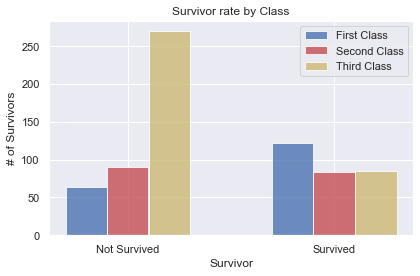

In [93]:
# data to plot
n_groups = 2
#Survived
pClassSurvival = Survived.groupby('Pclass', as_index = False).count()
#nSurvived
pClassSurvivalNotSurvival = nSurvived.groupby('Pclass', as_index = False).count()

#Group by Class and count 
groupby1 = Pclass1.groupby('Survived', as_index = False).count()
groupby2 = Pclass2.groupby('Survived',as_index = False).count()
groupby3 = Pclass3.groupby('Survived',as_index = False).count()


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

plt.bar(index, groupby1['PassengerId'], bar_width, alpha=opacity, color='b', label='First Class')
plt.bar(index+bar_width, groupby2['PassengerId'], bar_width, alpha=opacity, color='r', label='Second Class')
plt.bar(index+bar_width*2.02, groupby3['PassengerId'], bar_width, alpha=opacity, color='y', label='Third Class')


plt.xlabel('Survivor')
plt.ylabel('# of Survivors')
plt.title('Survivor rate by Class')
plt.xticks([0.2,1.2],('Not Survived','Survived'))
plt.legend()

plt.tight_layout()
plt.show()

In [131]:
#Zscore
z = np.abs(stats.zscore(titanic_number.dropna()))
z

array([[0.53037664, 0.51897787, 0.50589515, 1.72853202, 0.91123237,
        0.82702011],
       [0.57183099, 0.69189675, 0.50589515, 1.7246701 , 1.47636364,
        1.20916044],
       [0.25482473, 0.50621356, 0.50589515, 1.72080817, 0.91123237,
        1.20916044],
       ...,
       [0.73704057, 0.08877362, 0.50589515, 1.69699835, 1.47636364,
        1.20916044],
       [0.25482473, 0.08877362, 0.50589515, 1.70472221, 1.47636364,
        1.20916044],
       [0.15850313, 0.50952283, 0.50589515, 1.70858414, 0.91123237,
        0.82702011]])

In [135]:
#tréxirroldi
threshold = 3
print(np.where(z>3))
print(z[12][2])

(array([ 12,  22,  23,  66,  67,  93, 134, 208, 241, 248, 274, 288, 301,
       304, 350, 351, 351, 449, 482, 498, 505, 536, 537, 546, 555, 569,
       581, 586, 587, 589, 617, 620, 679, 686, 709], dtype=int64), array([2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2], dtype=int64))
5.3578895011310435


In [136]:
#IQR Score
Q1 = titanic_number.quantile(0.25)
Q3 = titanic_number.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Age             18.0000
Fare            23.3792
Parch            0.0000
PassengerId    654.0000
Pclass           1.0000
Survived         1.0000
dtype: float64
